In [244]:
%load_ext autoreload
%autoreload 2

import sys

import matplotlib.pyplot as plt

from random_proteome import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [245]:
AMINO_ACID_LST = list("ACDEFGHIKLMNPQRSTVWY")
print(AMINO_ACID_LST)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


In [246]:
template="uniprot-proteome_YEAST_UP000002311.fasta"
PROTEIN_NAME_LST, PROTEIN_SEQ_LST = read_template_proteome(template)
print(f"Read {len(PROTEIN_NAME_LST)} proteins.")
proteome_sequence = ''.join(PROTEIN_SEQ_LST)
print(f"Found {len(proteome_sequence)} amino acids.")
PROTEOME_AMINO_ACID_DISTRIBUTION = get_amino_acid_proportion(proteome_sequence, AMINO_ACID_LST)
PROTEOME_AMINO_ACID_DISTRIBUTION

Read 6049 proteins.
Found 2936363 amino acids.


{'A': 0.05488592520747605,
 'C': 0.012693253524853705,
 'D': 0.05836063184286139,
 'E': 0.06520821846617737,
 'F': 0.04435078360543298,
 'G': 0.049673354418374026,
 'H': 0.021724153314831986,
 'I': 0.06560496777816639,
 'K': 0.0733805731784524,
 'L': 0.0951128998696687,
 'M': 0.020859818762189824,
 'N': 0.06157276876190035,
 'P': 0.043780690602626446,
 'Q': 0.03950397140952941,
 'R': 0.04444613966325008,
 'S': 0.08987512783671502,
 'T': 0.059144254303708364,
 'V': 0.05556261266062813,
 'W': 0.010401643121099128,
 'Y': 0.033858211672058255}

# Random from template proteome

In [247]:
shuffled_proteome_sequence = shuffle_sequence(proteome_sequence)
random_protein_seq_lst = []
for original_prot_sequence in PROTEIN_SEQ_LST:
    random_sequence, shuffled_proteome_sequence = create_random_protein_from_proteome(
                                                    shuffled_proteome_sequence,
                                                    len(original_prot_sequence))
    random_protein_seq_lst.append(random_sequence)

In [248]:
write_fasta(random_protein_seq_lst, "random_proteome1.fasta")
write_distribution(random_protein_seq_lst, 
                   AMINO_ACID_LST, 
                   "random_proteome1.tsv", 
                   ref_distribution=PROTEOME_AMINO_ACID_DISTRIBUTION)

# Random from amino acid distribution

In [249]:
random_protein_seq_lst = []
for original_prot_sequence in PROTEIN_SEQ_LST:
    random_sequence = create_random_protein_from_distribution(
                            len(original_prot_sequence),
                            AMINO_ACID_LST,
                            amino_acid_distribution=amino_acid_distribution.values())
    random_protein_seq_lst.append(random_sequence)

In [250]:
write_fasta(random_protein_seq_lst, "random_proteome2.fasta")
write_distribution(random_protein_seq_lst, 
                   AMINO_ACID_LST, 
                   "random_proteome2.tsv", 
                   ref_distribution=PROTEOME_AMINO_ACID_DISTRIBUTION)

# Graphics

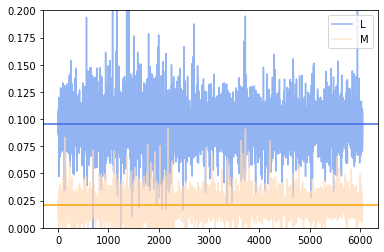

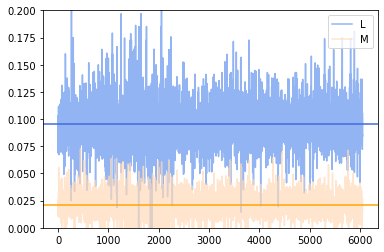

In [251]:
for index in [1, 2]:
    df = pd.read_csv(f"random_proteome{index}.tsv", sep="\t", index_col=0)
    fig, ax = plt.subplots()
    ax.plot(df.index[1:], df.loc[1:, "L"], label="L", color="cornflowerblue", alpha=0.7)
    ax.plot(df.index[1:], df.loc[1:, "M"], label="M", color="peachpuff", alpha=0.7)
    ax.legend(loc="upper right")
    ax.set_ylim(0, 0.2)
    ax.axhline(df.loc[0, "L"], color="royalblue")
    ax.axhline(df.loc[0, "M"], color="orange")
    fig.savefig(f"random{index}.png", dpi=300)